In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [4]:
path = "./rnd/"
all_files = glob.glob(path + "/*" + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, delimiter=";")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
frame.columns = frame.columns.str.replace("\t", "")

In [7]:
frame = frame.sort_values("Timestamp [ms]")

## Data Preparation

Text(0.5, 1.0, 'Average Memory usage and Memory capacity provisioned')

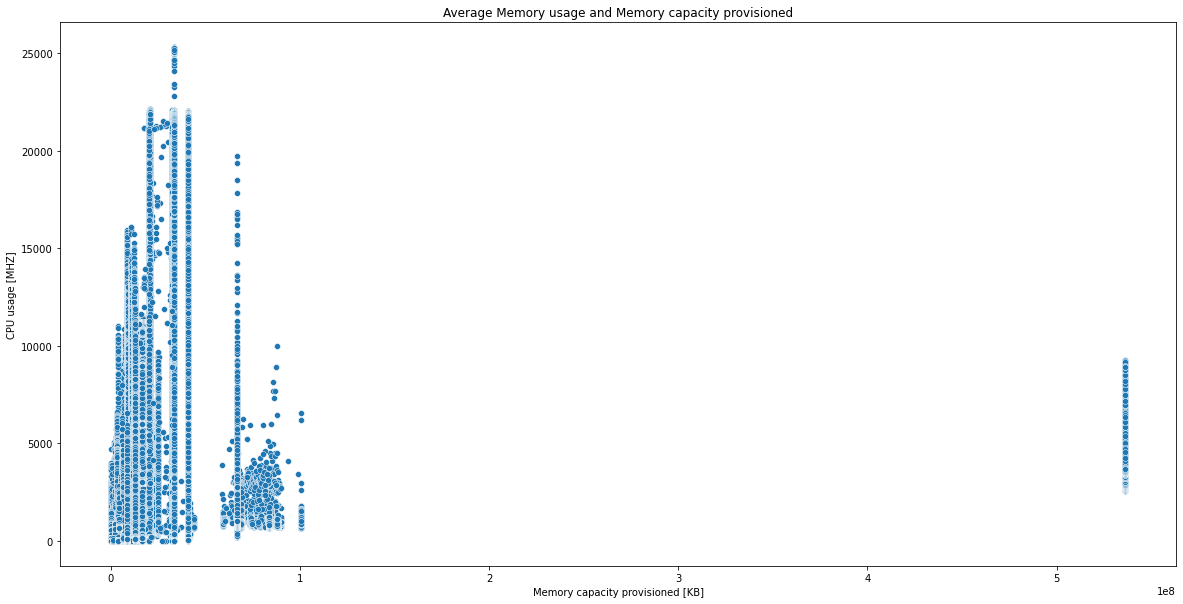

In [5]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=frame["Memory capacity provisioned [KB]"], y=frame["CPU usage [MHZ]"])
plt.title("Average Memory usage and Memory capacity provisioned")

In [6]:
Q1 = np.percentile(frame["Memory usage [KB]"], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(frame["Memory usage [KB]"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", frame.shape)
 
# Upper bound
upper = np.where(frame["Memory usage [KB]"] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(frame["Memory usage [KB]"] <= (Q1-1.5*IQR))


Old Shape:  (12496728, 11)


In [7]:
upper

(array([       0,      128,      186, ..., 12479900, 12488482, 12492443]),)

In [8]:
 
# ''' Removing the Outliers '''
# frame_1 = frame.drop(upper[0])
# frame2 = frame_1.drop(lower[0])

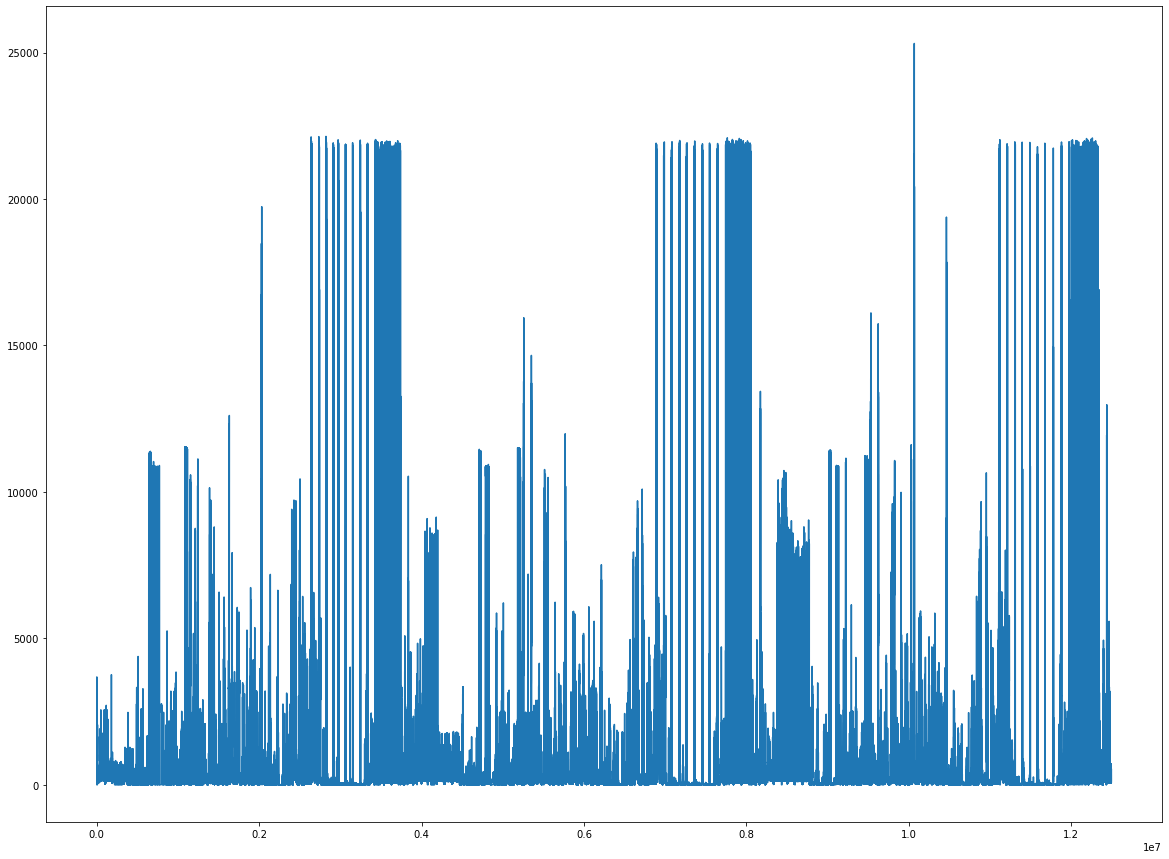

In [9]:
plt.figure(figsize=(20, 15))
plt.plot(frame["CPU usage [MHZ]"])

/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPU usage [%]'>

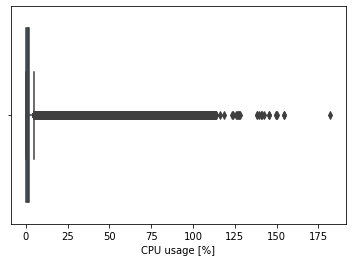

In [10]:
sns.boxplot(frame['CPU usage [%]'])

In [11]:
frame[frame["Timestamp [ms]"] == 1372629804]

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1372629804,2,5851.998900,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667
8260,1372629804,1,2599.999299,46.799987,1.800000,2097152.0,2.558496e+05,0.133333,9.333333,0.666667,4.533333
16509,1372629804,2,5199.999202,93.599986,1.800000,8357888.0,1.062549e+05,0.000000,10.066667,4.333333,0.000000
24755,1372629804,2,5199.998598,83.199978,1.600000,1562624.0,1.118467e+05,0.000000,9.800000,4.333333,0.000000
33004,1372629804,4,11703.997336,181.411959,1.550000,16703488.0,1.342176e+05,0.000000,12.466667,4.466667,0.066667
...,...,...,...,...,...,...,...,...,...,...,...
3849183,1372629804,2,5199.997934,481.866475,9.266667,8364032.0,4.529835e+05,2883.200000,102.400000,120.666667,670.000000
3857437,1372629804,2,5199.997934,3151.198748,60.600000,8357888.0,4.171933e+06,11028.000000,29.769231,43.000000,3930.533333
3865691,1372629804,2,5199.999240,116.133316,2.233333,8359936.0,2.013256e+05,0.466667,91.733333,10.533333,8.200000
3873943,1372629804,2,5199.998604,90.133309,1.733333,8357888.0,1.621779e+05,0.000000,9.933333,4.266667,0.000000


In [9]:
grouped_data = frame.groupby("Timestamp [ms]", as_index=False).mean()

In [16]:
pd.DataFrame(grouped_data['Timestamp [ms]'].diff())['Timestamp [ms]']

0           NaN
1         300.0
2         300.0
3         300.0
4         300.0
          ...  
100620     30.0
100621      3.0
100622      8.0
100623      1.0
100624     18.0
Name: Timestamp [ms], Length: 100625, dtype: float64

/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

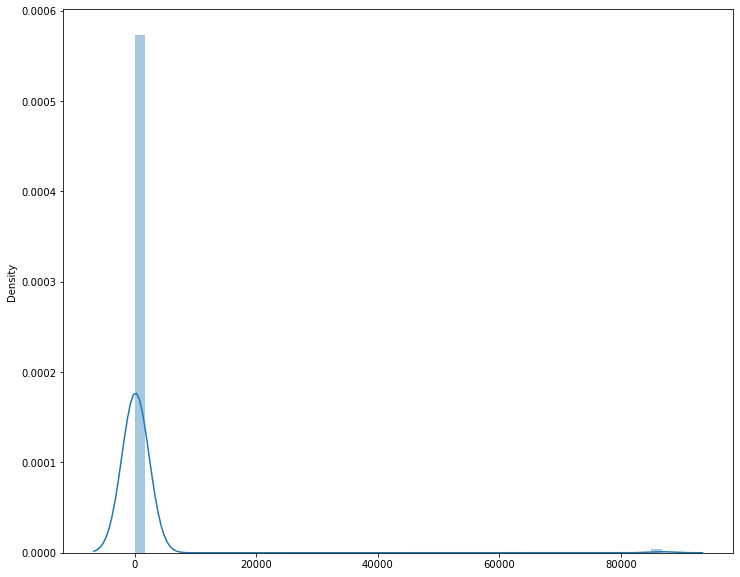

In [15]:
plt.figure(figsize=(12,10))
sns.distplot(pd.DataFrame(grouped_data['Timestamp [ms]'].diff())['Timestamp [ms]'].unique())

In [15]:
grouped_data = grouped_data.set_index("Timestamp [ms]")

In [23]:
grouped_data

,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
Timestamp [ms],,,,,,,,,,
1372629804,2.752941,7474.545346,298.171108,3.574106,9.551320e+06,319447.628549,103.856784,134.086673,51.464314,59.138353
1372630104,2.752941,7474.545346,291.959066,3.462391,9.551322e+06,348589.162667,128.117804,76.950118,32.200314,61.030902
1372630404,2.752941,7474.545346,296.955028,3.430962,9.551325e+06,381487.319216,118.836728,104.890286,33.657098,62.383373
1372630704,2.752941,7474.545345,296.525340,3.448871,9.551325e+06,367021.886745,103.984796,78.734983,36.180588,64.324275
1372631004,2.752941,7474.545345,353.987547,4.108980,9.551336e+06,366842.428235,128.944392,88.973255,34.996392,67.037725
...,...,...,...,...,...,...,...,...,...,...
1380491960,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
1380491963,4.000000,11703.997234,172.633959,1.475000,1.670349e+07,89478.400000,0.000000,0.100000,0.000000,0.100000
1380491971,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(grouped_data)

In [21]:
df_scaled = pd.DataFrame(df_scaled, columns=grouped_data.columns)

### H0: All columns 

In [25]:
x_train_h0, x_test_h0, y_train_h0, y_test_h0 = train_test_split(df_scaled.drop("CPU usage [MHZ]", axis=1), df_scaled["CPU usage [MHZ]"], test_size=0.2, shuffle=False)

### H1: Work with only predictive variable 

In [24]:
df_time = grouped_data["CPU usage [MHZ]"]
df_time = pd.DataFrame(df_time)

In [25]:
for i in range(1, 31):
    df_time[f"CPU usage {i}"] = df_time["CPU usage [MHZ]"].shift(i)

In [26]:
df_time

,CPU usage [MHZ],CPU usage 1,CPU usage 2,CPU usage 3,CPU usage 4,CPU usage 5,CPU usage 6,CPU usage 7,CPU usage 8,CPU usage 9,...,CPU usage 21,CPU usage 22,CPU usage 23,CPU usage 24,CPU usage 25,CPU usage 26,CPU usage 27,CPU usage 28,CPU usage 29,CPU usage 30
0,298.171108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,291.959066,298.171108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,296.955028,291.959066,298.171108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,296.525340,296.955028,291.959066,298.171108,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,353.987547,296.525340,296.955028,291.959066,298.171108,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100620,0.000000,254.524961,0.000000,7.713332,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,165.806627,0.000000,247.061148,0.000000,7.713332,0.000000,0.000000,0.000000,0.000000,0.0
100621,172.633959,0.000000,254.524961,0.000000,7.713332,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,165.806627,0.000000,247.061148,0.000000,7.713332,0.000000,0.000000,0.000000,0.0
100622,0.000000,172.633959,0.000000,254.524961,0.000000,7.713332,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,165.806627,0.000000,247.061148,0.000000,7.713332,0.000000,0.000000,0.0
100623,0.000000,0.000000,172.633959,0.000000,254.524961,0.000000,7.713332,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,165.806627,0.000000,247.061148,0.000000,7.713332,0.000000,0.0


In [28]:
df_time = df_time.dropna()

### Machine Learning

In [37]:
def get_model_score(pipeline, X_train, X_test, y_train, y_test):
    
    pipeline.fit(X_train, y_train)
    
    r2_score_train = r2_score(y_train, pipeline.predict(X_train))
    r2_score_test = r2_score(y_test, pipeline.predict(X_test))
    
    mse_train = mean_absolute_error(y_train, pipeline.predict(X_train))
    mse_test = mean_absolute_error(y_test, pipeline.predict(X_test))
    
    
    print("R2 score_train: ", r2_score_train)
    print("R2 score_test: ", r2_score_test)
    print("Train Mean Squeare Error: ", mse_train)
    print("Test Mean Squeare Error: ", mse_test)



In [38]:
get_model_score(LinearRegression(), x_train_h0, x_test_h0, y_train_h0, y_test_h0)

R2 score_train:  0.985234190127251
R2 score_test:  0.9582314293297968
Train Mean Squeare Error:  0.007370173751855452
Test Mean Squeare Error:  0.0067167353620678745


In [39]:
get_model_score(DecisionTreeRegressor(), x_train_h0, x_test_h0, y_train_h0, y_test_h0)

R2 score_train:  1.0
R2 score_test:  0.919949774278288
Train Mean Squeare Error:  9.149250333218317e-12
Test Mean Squeare Error:  0.0033166425280644622
